# Environnement

In [1]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

# Import data

## Zones

In [186]:
gdf_za = gpd.read_file('data/CCSL/deveco.za.shp')
gdf_za = gdf_za[['za_id', 'za_commune', 'za_nom', 'geometry']]
gdf_za = gdf_za[gdf_za['za_nom'].isin(['ZA LES RAGONNIERES', 'ZA LES ROITELIERES', 'ZA LES PETITS PRIMEAUX'])]
gdf_za['centroid'] = gdf_za['geometry'].centroid
gdf_za['lon'] = gdf_za.centroid.x
gdf_za['lat'] = gdf_za.centroid.y
gdf_za

,za_id,za_commune,za_nom,geometry,centroid,lon,lat
0,3,44032,ZA LES RAGONNIERES,"POLYGON ((370193.990 6683581.190, 370174.930 6...",POINT (370195.631 6683699.998),370195.630969,6.683700e+06
16,7,44117,ZA LES ROITELIERES,"POLYGON ((370991.379 6681651.920, 370990.427 6...",POINT (370684.096 6681362.453),370684.096206,6.681362e+06
22,8,44117,ZA LES PETITS PRIMEAUX,"POLYGON ((369241.401 6681765.420, 369249.382 6...",POINT (369456.791 6681516.129),369456.790676,6.681516e+06


In [187]:
poly_rag = gdf_za[gdf_za['za_nom'] == 'ZA LES RAGONNIERES']['geometry'].iloc[0]
poly_roi = gdf_za[gdf_za['za_nom'] == 'ZA LES ROITELIERES']['geometry'].iloc[0]
poly_pet = gdf_za[gdf_za['za_nom'] == 'ZA LES PETITS PRIMEAUX']['geometry'].iloc[0]

polys = gpd.GeoSeries({
    'rag': poly_rag,
    'roi': poly_roi,
    'pet': poly_pet
})

## Batiment de production

In [195]:
gdf_prod = gpd.read_file('data/site_de_production/sites_production_sup_100kw_2154.shp')

gdf_prod['centroid'] = gdf_prod['geometry'].centroid
gdf_prod = gdf_prod.assign(**{key: gdf_prod['centroid'].within(geom) for key, geom in polys.items()})
gdf_prod

,fid,id_bat,epci,code_epci,commune,code_comm,nom_iris,code_iris,src_bat,id_bdtopo,...,puiss_pv,eco_ges,class_puis,layer,path,geometry,centroid,rag,roi,pet
0,651.0,BAT_SYDELA_516742,CC SEVRE ET LOIRE,CC_SL,DIVATTE-SUR-LOIRE,44029,LES COTEAUX,440290102,None,BATIMENT0000000309703482,...,132.63,693.7991,5,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((371777.401 6693592.100, 371799.601 6...",POINT (371784.064 6693570.346),False,False,False
1,3192.0,BAT_SYDELA_516121,CC SEVRE ET LOIRE,CC_SL,MOUZILLON,44108,MOUZILLON,0,None,BATIMENT0000000309702154,...,109.80,641.9316,5,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((375619.173 6679606.739, 375618.334 6...",POINT (375613.623 6679620.299),False,False,False
2,7908.0,BAT_SYDELA_480297,CC SEVRE ET LOIRE,CC_SL,SAINT-JULIEN-DE-CONCELLES,44169,LA VALLEE,441690102,None,BATIMENT0000002011314593,...,163.10,831.4568,6,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((368279.992 6694661.854, 368279.900 6...",POINT (368291.170 6694686.131),False,False,False
3,14549.0,BAT_SYDELA_483161,CC SEVRE ET LOIRE,CC_SL,SAINT-JULIEN-DE-CONCELLES,44169,LA VALLEE,441690102,None,BATIMENT0000000308879859,...,395.57,1998.7974,7,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((368335.953 6694650.597, 368335.800 6...",POINT (368349.715 6694685.794),False,False,False
4,14811.0,BAT_SYDELA_478920,CC SEVRE ET LOIRE,CC_SL,LE LOROUX-BOTTEREAU,44084,LE LOROUX-BOTTEREAU,0,None,BATIMENT0000000309701277,...,150.09,845.1422,6,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((375114.100 6691960.300, 375111.500 6...",POINT (375092.491 6691949.861),False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,207293.0,BAT_SYDELA_489195,CC SEVRE ET LOIRE,CC_SL,DIVATTE-SUR-LOIRE,44029,LES COTEAUX,440290102,None,BATIMENT0000000308879479,...,117.58,678.2641,5,Indeterminés (dont serres agricoles),E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((373411.361 6697255.167, 373410.799 6...",POINT (373444.649 6697281.422),False,False,False
592,209682.0,BAT_SYDELA_480142,CC SEVRE ET LOIRE,CC_SL,DIVATTE-SUR-LOIRE,44029,LA VALLEE,440290101,None,BATIMENT0000000309664024,...,215.39,1114.9020,6,Indeterminés (dont serres agricoles),E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((368532.031 6694993.396, 368532.400 6...",POINT (368487.564 6695055.576),False,False,False
593,213352.0,BAT_SYDELA_480998,CC SEVRE ET LOIRE,CC_SL,SAINT-JULIEN-DE-CONCELLES,44169,LA VALLEE,441690102,None,BATIMENT0000002011319890,...,904.87,4437.3573,8,Indeterminés (dont serres agricoles),E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((363355.230 6691550.840, 363346.500 6...",POINT (363365.700 6691616.047),False,False,False
594,222567.0,BAT_SYDELA_1109161,CC SEVRE ET LOIRE,CC_SL,SAINT-JULIEN-DE-CONCELLES,44169,LES CHAMPS,441690103,None,None,...,182.18,956.7445,6,Indeterminés (dont serres agricoles),E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((366936.703 6692039.264, 366939.680 6...",POINT (366913.549 6692032.674),False,False,False


## Batiment de consommation

In [309]:
gdf_conso_annuelle = gpd.read_file('data/conso_bati_annuelle/vdef_conso_bati_public.shp')
gdf_conso_annuelle

,ID de la z,Nom de l'o,Nom de l'E,Année,Nom de la,Usage,Actvité p,Année de,Décret Ec,Surface to,Energie de,Consommati,Conso surf,Comptage h,Consomma_1,new_name,geometry
0,44-BOI-001 - 44-BOI-001-001 - AGENCE POSTALE,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,AGENCE POSTALE,"Autres services (maison de services au public,...",Autres services administratifs (hors services ...,None,None,NaN,None,2.506658,NaN,Oui,None,Service public et administratif Autre service ...,POINT (380815.528 6689852.629)
1,44-BOI-002 - 44-BOI-002-001 - ATELIER MUNICIPAL,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,BIBLIOTHEQUE,Ateliers/centres techniques municipaux/serres ...,Batiments techniques communaux (hors services),None,None,NaN,None,23.991839,NaN,Oui,None,Service public et administratif Autre service ...,POINT (381051.660 6689700.865)
2,44-BOI-003 - 44-BOI-003-001 - ATELIER TECHNIQUE,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,ATELIER TECHNIQUE,Ateliers/centres techniques municipaux/serres ...,Batiments techniques communaux (hors services),None,None,NaN,None,5.312562,NaN,Oui,None,Service public et administratif Autre service ...,POINT (381079.157 6690140.795)
3,44-BOI-004 - 44-BOI-004-001 - MAIRIE,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,MAIRIE,"Services administratifs communaux (mairie, mai...",Bâtiments administratifs communaux (services),None,None,NaN,None,4.365427,NaN,Oui,None,Service public et administratif Administration...,POINT (381006.641 6689803.252)
4,44-BOI-005 - 44-BOI-005-001 - SALLE BUXERIA,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,SALLE BUXERIA,"Locaux communaux (local, foyer des jeunes, loc...",Equipements socio-culturels,None,None,NaN,None,15.322747,NaN,Oui,None,Socio-culturel Autre équipement socio-culturel,POINT (380980.908 6689950.849)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,None,None,None,NaN,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,POINT (253531.131 909838.931)
995,None,None,None,NaN,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,POINT (253531.131 909838.931)
996,None,None,None,NaN,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,POINT (253531.131 909838.931)
997,None,None,None,NaN,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,POINT (253531.131 909838.931)


## Note opérateur

In [237]:
df_note = pd.read_excel('data/SYDELA/4- 20220925_Typologie-note-elec_EBO.xlsx', sheet_name='TYPOLOGIE BATI VF', header=1)
df_note = df_note.fillna(method='ffill')

In [252]:
df_note['new_name'] = list(df_note['Usage'] +  ' ' + df_note['Détail'])

# Calcul

In [247]:
gdf_prod_zone = gdf_prod[gdf_prod['rag'] == True]

In [356]:
gdf_prod_zone['circle_2km'] = gdf_prod_zone['centroid'].buffer(2000, 2)

c:\users\flore\documents\medas\geocomputation\venv\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


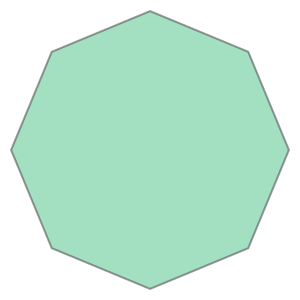

In [357]:
gdf_prod_zone['circle_2km'][20]

In [337]:
df_bati_prod = gdf_prod_zone.iloc[0]
circle_2km = df_bati_prod['circle_2km']
prod_bati = df_bati_prod['pot_pv'] / 1000
gdf_conso_annuelle_zone = gdf_conso_annuelle[gdf_conso_annuelle['geometry'].within(circle_2km) == True]

In [338]:
gdf_conso_annuelle_zone = gdf_conso_annuelle_zone.merge(df_note, how='left', on='new_name')
gdf_conso_annuelle_zone = gdf_conso_annuelle_zone[['ID de la z', "Nom de l'o", 'Nom de la', 'Actvité p', 'Consommati', 'geometry', 'Note de compatibilité profil électrique ACC (1-10)']]
gdf_conso_annuelle_zone.columns = ['id', 'nom_ville', 'nom_bati', 'activite', 'conso_annuelle', 'point', 'note']

In [339]:
gdf_conso_annuelle_zone_sort = gdf_conso_annuelle_zone.sort_values(by='note', ascending=False)
gdf_conso_annuelle_zone_sort['conso_cum'] = gdf_conso_annuelle_zone_sort['conso_annuelle'].cumsum()

In [340]:
gdf_conso_annuelle_zone_sort[gdf_conso_annuelle_zone_sort['conso_cum'] < prod_bati]

,id,nom_ville,nom_bati,activite,conso_annuelle,point,note,conso_cum
2,44-CHH-00444-CHH-004- 001-ATELIERS MUNICIPAUX,LA-CHAPELLE-HEULIN,ATELIERS MUNICIPAUX,Bâtiments administratifs communaux (services),10.969206,POINT (371237.275 6684179.468),7,10.969206
1,44-CHH-00244-CHH-002- 001-MAIRIE,LA-CHAPELLE-HEULIN,MAIRIE,Bâtiments administratifs communaux (services),12.599429,POINT (371133.172 6683992.648),6,23.568635
0,44-CHH-00144-CHH-001- 001-ECOLE MATERNELLE,LA-CHAPELLE-HEULIN,ECOLE MATERNELLE,"Enseignement (écoles, groupes scolaires y comp...",26.105737,POINT (371278.889 6683806.189),5,49.674372
5,44-CHH-00744-CHH-007- 001-ECOLE ELEMENTAIRE,LA-CHAPELLE-HEULIN,ECOLE ELEMENTAIRE,"Enseignement (écoles, groupes scolaires y comp...",13.849690,POINT (371561.715 6683699.975),5,63.524062
8,44-CHH-01244-CHH-012- 001-SALLE MANEYROL + RES...,LA-CHAPELLE-HEULIN,SALLE MANEYROL + RESTAURANT SCOLAIRE,"Enseignement (écoles, groupes scolaires y comp...",0.000000,POINT (371561.715 6683699.975),5,63.524062
6,44-CHH-00844-CHH-008- 001-SALLE GEORGETTE DROUET,LA-CHAPELLE-HEULIN,SALLE GEORGETTE DROUET,Equipements socio-culturels,14.133059,POINT (371671.097 6684115.830),2,77.657121
7,44-CHH-00944-CHH-009- 001-TERRAIN DES FETES MO...,LA-CHAPELLE-HEULIN,TERRAIN DES FETES MONTRU,Equipements socio-culturels,0.170773,POINT (369064.427 6684880.223),2,77.827895
3,44-CHH-00544-CHH-005- 001-SALLE SPORTS (SPORT...,LA-CHAPELLE-HEULIN,"SALLE SPORTS (SPORTS, MDJ)",Equipements sportifs (intérieurs/extérieurs),56.404616,POINT (371169.089 6684519.926),0,134.232511
4,44-CHH-00644-CHH-006- 001-TERRAIN DES SPORTS,LA-CHAPELLE-HEULIN,TERRAIN DES SPORTS,Equipements sportifs (intérieurs/extérieurs),19.738946,POINT (371169.089 6684519.926),0,153.971457
